In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam


# input file path
workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario3_EYDC-9K"
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7867321242121240432
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16097461122789034336
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# input and index file
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [4]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [6]:
# checking the size of dataset
x.shape

(9590, 41505)

In [7]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [8]:
# hyperparameters of this model
num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100


In [9]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array




In [10]:
# data shaping for ResNet model
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
#input_shape = (img_rows, img_cols, 1)

In [11]:
# data shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505, 1) (8631,) (959, 41505, 1) (959,)


In [12]:
# defining of data type
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505, 1)
8631 train samples
959 test samples


In [13]:
training_image_array.shape

(8631, 41505)

In [14]:
# model architecture
with K.tf.device('/GPU:0'):
    inputs = Input(shape=(train_X.shape[1],1),name='inputs')

    x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
    x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
#     y = x
    x = Activation('tanh')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)
    
    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

#     x = AveragePooling1D(pool_size=8)(x)
    x = Flatten()(x)
    x = Dense(units=2048, name='dense1'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout1') (x)
    x = Activation('relu')(x)

#    x = Reshape((300,1))(x)

#    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
#    x = MaxPooling1D(pool_size=2)(x)
#    x = BatchNormalization()(x)

    x = Dense(units=1024, name='dense5'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout5') (x)
    x = Activation('relu')(x)

    x = Dense(units=512, name='dense6'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout6') (x)
    x = Activation('relu')(x)

    x = Dense(units=1024, name='dense7'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout7') (x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Dense(units=512, name='dense8'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout8') (x)
    x = Activation('relu')(x)
    
    x = Dense(units=256, name='dense9'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout9') (x)
    x = Activation('relu')(x)

    x = Dense(units=128, name='dense10'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout10') (x)
    x = Activation('relu')(x)


    predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
#     predictions = Dense(1, activation='linear', name='predictions')(x)

    

    model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate),
                  metrics=['mse','mae'])


W0915 12:32:42.815583  9476 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 12:32:42.817535  9476 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:71: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0915 12:32:42.818512  9476 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0915 12:32:42.956128  9476 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3900: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0915 12:32:43.007857  9476 dep

In [15]:
# model architecture
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 41505, 1)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 20753, 16)    64          inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 4150, 16)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4150, 16)     64          max_pooling1d_1[0][0]            
__________________________________________________________________________________________________
activation

In [16]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit(train_X, training_label_array, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        validation_data=(test_X, test_label_array))

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 12:32:44.948331
Train on 8631 samples, validate on 959 samples
Epoch 1/150
8631/8631 [==============================] - 31s 4ms/step - loss: 4.7291 - mean_squared_error: 4.7291 - mean_absolute_error: 1.9739 - val_loss: 4.6872 - val_mean_squared_error: 4.6872 - val_mean_absolute_error: 1.9673
Epoch 2/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.7017 - mean_squared_error: 4.7017 - mean_absolute_error: 1.9651 - val_loss: 4.6579 - val_mean_squared_error: 4.6579 - val_mean_absolute_error: 1.9580
Epoch 3/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.6752 - mean_squared_error: 4.6752 - mean_absolute_error: 1.9565 - val_loss: 4.6294 - val_mean_squared_error: 4.6294 - val_mean_absolute_error: 1.9487
Epoch 4/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.6493 - mean_squared_error: 4.6493 - mean_absolute_error: 1.9480 - val_loss: 4.6017 - val_mean_squared_error: 4.6017 - val_mean_absolute_error: 1

8631/8631 [==============================] - 20s 2ms/step - loss: 4.1538 - mean_squared_error: 4.1538 - mean_absolute_error: 1.7288 - val_loss: 4.0538 - val_mean_squared_error: 4.0538 - val_mean_absolute_error: 1.7058
Epoch 37/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.1463 - mean_squared_error: 4.1463 - mean_absolute_error: 1.7235 - val_loss: 4.0448 - val_mean_squared_error: 4.0448 - val_mean_absolute_error: 1.7001
Epoch 38/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.1391 - mean_squared_error: 4.1391 - mean_absolute_error: 1.7184 - val_loss: 4.0364 - val_mean_squared_error: 4.0364 - val_mean_absolute_error: 1.6946
Epoch 39/150
8631/8631 [==============================] - 21s 2ms/step - loss: 4.1323 - mean_squared_error: 4.1323 - mean_absolute_error: 1.7132 - val_loss: 4.0280 - val_mean_squared_error: 4.0280 - val_mean_absolute_error: 1.6890
Epoch 40/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.1259 - m

8631/8631 [==============================] - 20s 2ms/step - loss: 4.0439 - mean_squared_error: 4.0439 - mean_absolute_error: 1.6051 - val_loss: 3.9092 - val_mean_squared_error: 3.9092 - val_mean_absolute_error: 1.5738
Epoch 72/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0435 - mean_squared_error: 4.0435 - mean_absolute_error: 1.6036 - val_loss: 3.9084 - val_mean_squared_error: 3.9084 - val_mean_absolute_error: 1.5723
Epoch 73/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0431 - mean_squared_error: 4.0431 - mean_absolute_error: 1.6020 - val_loss: 3.9076 - val_mean_squared_error: 3.9076 - val_mean_absolute_error: 1.5708
Epoch 74/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0427 - mean_squared_error: 4.0427 - mean_absolute_error: 1.6005 - val_loss: 3.9067 - val_mean_squared_error: 3.9067 - val_mean_absolute_error: 1.5691
Epoch 75/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0425 - m

8631/8631 [==============================] - 20s 2ms/step - loss: 4.0406 - mean_squared_error: 4.0406 - mean_absolute_error: 1.5822 - val_loss: 3.8988 - val_mean_squared_error: 3.8988 - val_mean_absolute_error: 1.5500
Epoch 107/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0406 - mean_squared_error: 4.0406 - mean_absolute_error: 1.5824 - val_loss: 3.8989 - val_mean_squared_error: 3.8989 - val_mean_absolute_error: 1.5503
Epoch 108/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0406 - mean_squared_error: 4.0406 - mean_absolute_error: 1.5824 - val_loss: 3.8989 - val_mean_squared_error: 3.8989 - val_mean_absolute_error: 1.5502
Epoch 109/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0405 - mean_squared_error: 4.0405 - mean_absolute_error: 1.5824 - val_loss: 3.8989 - val_mean_squared_error: 3.8989 - val_mean_absolute_error: 1.5502
Epoch 110/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0405

8631/8631 [==============================] - 20s 2ms/step - loss: 4.0406 - mean_squared_error: 4.0406 - mean_absolute_error: 1.5806 - val_loss: 3.8983 - val_mean_squared_error: 3.8983 - val_mean_absolute_error: 1.5484
Epoch 142/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0406 - mean_squared_error: 4.0406 - mean_absolute_error: 1.5811 - val_loss: 3.8984 - val_mean_squared_error: 3.8984 - val_mean_absolute_error: 1.5487
Epoch 143/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0405 - mean_squared_error: 4.0405 - mean_absolute_error: 1.5810 - val_loss: 3.8984 - val_mean_squared_error: 3.8984 - val_mean_absolute_error: 1.5486
Epoch 144/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0405 - mean_squared_error: 4.0405 - mean_absolute_error: 1.5808 - val_loss: 3.8984 - val_mean_squared_error: 3.8984 - val_mean_absolute_error: 1.5485
Epoch 145/150
8631/8631 [==============================] - 20s 2ms/step - loss: 4.0405

In [17]:
# model save
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//200914_reupload//Result//EYDC-9K"
# Option 1: Save Weights + Architecture
model.save_weights(workdir + '//EYDC9K_ResNet_model_weight_v3.h5')
with open(workdir + '//EYDC9K_ResNet_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())

In [18]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EYDC9K_ResNet_model_entire_model.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [19]:
# model evaluation
test_eval = model.evaluate(test_X, test_label_array, verbose=1)

959/959 [==============================] - 1s 788us/step


In [20]:
test_eval

[3.8983316177869365, 3.8983316177869365, 1.5484510918727632]

In [21]:
# loss record
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [22]:
# loss record
np.savetxt("EYDC9K_ResNet_acc_cls3_fix_2080ti_v3.csv", np_acc, delimiter=",")
np.savetxt("EYDC9K_ResNet_val_acc_cls3_fix_2080ti_v3.csv", np_val_acc, delimiter=",")
np.savetxt("EYDC9K_ResNet_loss_cls3_fix_2080ti_v3.csv", np_loss, delimiter=",")
np.savetxt("EYDC9K_ResNet_val_loss_cls3_fix_2080ti_v3.csv", np_val_loss, delimiter=",")

In [23]:
import matplotlib
from matplotlib import pyplot as plt

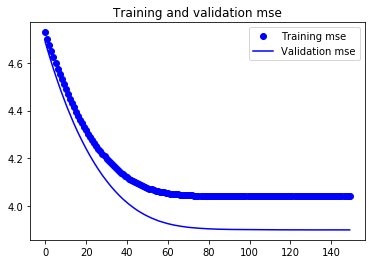

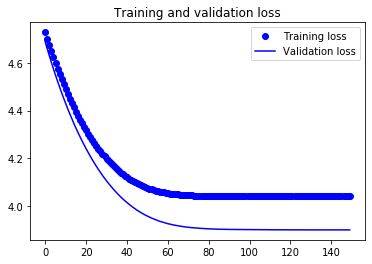

In [24]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//EYDC9K_ResNet_mse_loss_plot.png')
plt.show()

In [ ]:
predicted_value = predicted_classes

In [ ]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
c.to_csv(workdir + '//200915_EYDC9K_ResNet_pred_and_val_result.csv', index=False)


In [25]:
# result table
c.head()

NameError: name 'c' is not defined

In [ ]:
predicted_value.shape

In [ ]:
# scatter plot
plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//EYDC9K_ResNet_test_scatterplot.png')

In [ ]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

In [ ]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

In [ ]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))